In [13]:
from runtest import *
from Data_binary import *

In [14]:
env = Data(unknown_rate=1)
env.loadfile("liver.csv") # change this to the test file
env.normalize()
env.alpha = 0
env.cluster_K_means(7)
# this makes it so when we do the ranking, we only check against this number
# of data points; ignore for now
#env.set_validation(2000)
# makes the costs uniform; we won't have groups either
env.set_costs()

# partition into training/test sets
test_env = env.split(0.80)
print("training points:", len(env.data))
print("test points:", len(test_env.data))

training points: 464
test points: 115


In [18]:
costs = [(i+1)/10 for i in range(10)] # list of maximum budgets
results = [] # stores all the results for each value of budget
for c in costs:
    env.max_cost = c
    test_env.max_cost = c
    # take the average of 3 trainings
    r1 = 0
    r2 = 0
    for i in range(3):
        rtemp = runtest(env,test_env)
        r1 = r1 + rtemp[2]
        r2 = r2 + rtemp[3]
    print("At cost:", c, r1/3, r2/3)
    results.append(rtemp)

At cost: 0.1 575.6764785958417 754.6209810105429
At cost: 0.2 525.7227235749384 682.8733850279037
At cost: 0.3 512.7722161032469 681.6647766843067
At cost: 0.4 389.0244199597708 533.1046724353008
At cost: 0.5 336.46795213237834 457.0963662856552
At cost: 0.6 329.5819442760135 415.58823811570693


KeyboardInterrupt: 

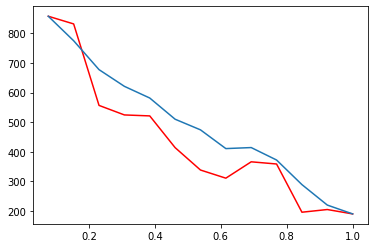

In [5]:
import matplotlib.pyplot as plt

# this value is the total distance between p and 5 closest predicted points to p
resRL = [results[i][2] for i in range(len(results))]
resRAND = [results[i][3] for i in range(len(results))]
plt.plot(costs, resRL, 'r', costs, resRAND)
plt.show()

In [5]:
# we will write the results to BENCHMARK/<test>.csv
f = open('BENCHMARK/liver_test.csv', 'w')

def write(f,lst):
    for l in lst:
        f.write(str(l))
        f.write(' ')

# first write the number of test points
f.write(str(len(test_env.data)))
f.write('\n')
        
# write the cost
write(f,costs)
f.write('\n')

# write the RL result
write(f,resRL)
f.write('\n')

# finally write the random results
write(f, resRAND)
f.write('\n')

f.close()